In [1]:
from matplotlib import pylab as plt
dir1 = '/Volumes/THEMBA/Real/'
from scipy import log,sqrt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [2]:
line = open('/Volumes/THEMBA/Real/WSRT_SMOOTH_ALL_SORTED','r').readlines()
vel_tm1,mass_tm1  = [],[]  #sources common between themba and mpati
vel_t1,mass_t1  = [],[]    #sources from themba's catalogue only
w50_t1,w20_t1 = [],[]
w50_tm1,w20_tm1 = [],[]
F_peak_t1,F_int_t1 = [],[]
F_peak_tm1,F_int_tm1 = [],[]
l1,b1 = [],[]
VELO1= []
for x in line[1:]:
    k=x.split()
    l1.append(float(k[5]))
    b1.append(float(k[6]))
    VELO1.append(int(k[7]))
    if k[1]=='-':
        vel_t1.append(int(k[7]))
        mass_t1.append(float(k[-2]))
        F_int_t1.append(float(k[-6]))
        F_peak_t1.append(float(k[-9]))
        w50_t1.append(float(k[-12]))
        w20_t1.append(float(k[-15]))
    else:
        vel_tm1.append(int(k[7]))
        mass_tm1.append(float(k[-2]))
        F_int_tm1.append(float(k[-6]))
        F_peak_tm1.append(float(k[-9]))
        w50_tm1.append(float(k[-12]))
        w20_tm1.append(float(k[-15]))
    
    


In [3]:
line = open('/Volumes/THEMBA/Real/misse_by_SOFIA','r').readlines()
vel_tm,mass_tm  = [],[]  #sources common between themba and mpati
vel_t,mass_t  = [],[]    #sources from themba's catalogue only
w50_t,w20_t = [],[]
w50_tm,w20_tm = [],[]
F_peak_t,F_int_t = [],[]
F_peak_tm,F_int_tm = [],[]
l,b = [],[]
VELO= []
for x in line[1:]:
    k=x.split()
    l.append(float(k[7]))
    b.append(float(k[8]))
    VELO.append(int(k[9]))
    if k[2]=='999':
        vel_t.append(int(k[9]))
        mass_t.append(float(k[-1]))
        F_int_t.append(float(k[-4]))
        F_peak_t.append(float(k[-7]))
        w50_t.append(float(k[15]))
        w20_t.append(float(k[12]))
    else:
        vel_tm.append(int(k[9]))
        mass_tm.append(float(k[-1]))
        F_int_tm.append(float(k[-4]))
        F_peak_tm.append(float(k[-7]))
        w50_tm.append(float(k[15]))
        w20_tm.append(float(k[12]))
    
    


In [4]:
sig = 0.4e-3
def Yima(v_i,v_f,w):
    Vel = [x for x in np.linspace(v_i,v_f+1000.,100)]
    
    S_int = 3.*sig*w
    d =  np.array(Vel)/70.

    hi_mass = 2.36e+5 * S_int* d**2
    HI_mass = []
    for x in hi_mass:
        mass = log(x)/log(10.)
        HI_mass.append(mass)
    Vel = np.array(Vel)
    HI_mass = np.array(HI_mass)
    return Vel, HI_mass

In [5]:
Velo,Mass = Yima(2.5e3,18e3,2.5e2)
Velo1,Mass1 = Yima(2.5e3,18e3,1e2)
Velo2,Mass2 = Yima(2.5e3,18e3,3e2)

#Total cube
VEL_tm,MASS_tm     = vel_tm+vel_tm1, mass_tm + mass_tm1
VEL_t,MASS_t       = vel_t+vel_t1, mass_t+mass_t1
W50_t,W20_t        = w50_t+w50_t1, w20_t+w20_t1
W50_tm,W20_tm      = w50_tm+w50_tm1, w20_tm+w20_tm1
F_PEAK_t,F_INT_t   = F_peak_t+F_peak_t1, F_int_t+F_int_t1
F_PEAK_tm,F_INT_tm = F_peak_tm+F_peak_tm1, F_int_tm+F_int_tm1
L,B = l+l1,b+b1


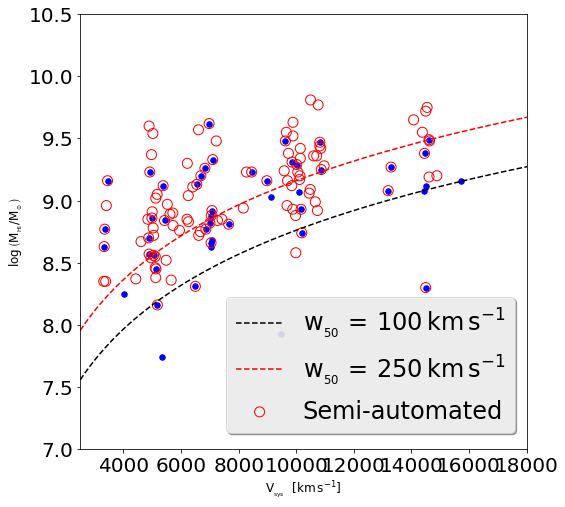

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(vel_t,mass_t,s=120,marker='.',edgecolors='b',facecolors='b')#,label='Visual sources')  # 'v' themba only
plt.scatter(vel_tm,mass_tm,s=120,marker='.',edgecolors='b',facecolors='b')
plt.scatter(VEL_tm,MASS_tm,s=100,marker='o',edgecolors='r',facecolors='none',label=r'Semi-automated')
plt.plot(Velo1,Mass1,'k--',label=r'$\mathrm{w_{_{50}}\,=\,100 \, km\,s^{-1}}$')
plt.plot(Velo,Mass,'r--',label=r'$\mathrm{w_{_{50}}\,=\,250 \, km\,s^{-1}}$')
plt.xlim(2.50e3,18e3)
plt.ylim(7,10.5)
plt.legend(loc='lower right', bbox_to_anchor=(1, .01),ncol=1, fancybox=True, shadow=True,numpoints=1,fontsize=24)
plt.xlabel(r'$\mathrm{V_{_{sys}}\,\,\ [km\,s^{-1}]}$',fontsize=12)
plt.ylabel(r'$\log \,\left(\mathrm{{M_{_{HI}}}/{M_{_\odot}}} \right)$',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12
          )
#plt.savefig('../../Presentation/themba1-9:TM.pdf')
plt.show()

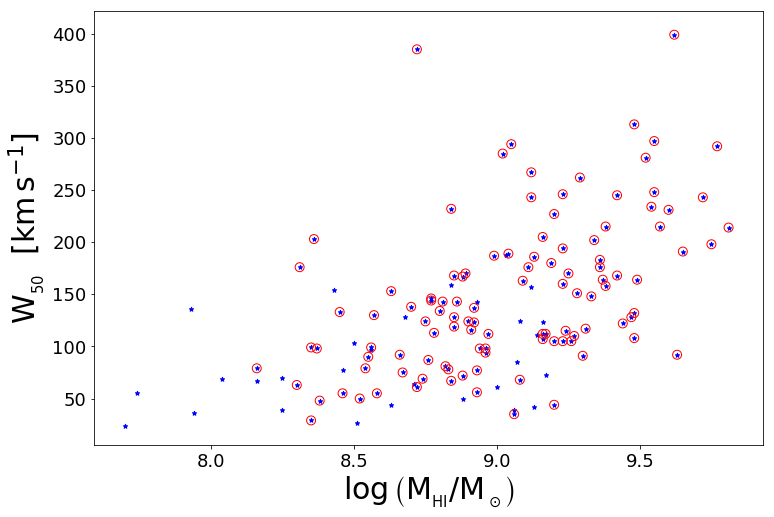

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(MASS_t,W50_t,s=20,marker='*',edgecolors='b',facecolors='b',label='Visual')
plt.scatter(MASS_tm,W50_tm,s=20,marker='*',edgecolors='b',facecolors='b')
plt.scatter(MASS_tm,W50_tm,s=80,marker='o',edgecolors='r',facecolors='none')
#plt.xlim(2.50e3,18e3)
#plt.ylim(7,10.5)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=5, fancybox=True, shadow=True,numpoints=1,fontsize=14)
plt.ylabel(r'$\mathrm{W_{_{50}}\,\,\ [km\,s^{-1}]}$',fontsize=30)
plt.xlabel(r'$\log \,\left(\mathrm{{M_{_{HI}}}/{M_{_\odot}}} \right)$',fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.savefig('../../Presentation/W50:mass_dist1-9:TM.pdf')
plt.show()

In [8]:
def Diff(F_peak_t,F_peak_tm,Bin):
    D   = plt.hist(F_peak_tm,Bin)
    global h_x
    h_x = D[1]
    h_y = D[0]
    D1  = plt.hist(F_peak_tm+F_peak_t,bins=h_x)
    H_x = D1[1]
    H_y = D1[0]
    dif = H_y - h_y
    return dif,h_x

In [9]:
def Mahluko(h_x,dif):
    z =[0 for x in range(len(h_x)*2-1)]
    zizo =[0 for x in range(len(h_x)*2-1)]  
    z[-1]=h_x[-1]
    z[0]=h_x[0]
    i=1
    j=1
    while i < len(h_x):
        z[j]=h_x[i]
        z[j+1]=h_x[i]
        j = j+2
        i=i+1
    
    zizo[-1]=dif[-1]
    zizo[-2]=dif[-1]
    zizo[0]=dif[0]
    i=1
    j=1
    while i < len(dif):
        zizo[j]=dif[i-1]
        zizo[j+1]=dif[i]
        j = j+2
        i=i+1
    
    zi=zizo[:-1]
    zz = z[:-1]
    return zi,zz

In [10]:
# Three subplots sharing both x/y axes
def Histo(F_peak_t,F_peak_tm,n):
    bins=10
    f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True,figsize=(13,8))
    binz=ax1.hist(F_peak_t+F_peak_tm,histtype='step',bins=bins,label='V$-$SAC',color='r', alpha=0.8)[1]
    ax1.hist(F_peak_tm,bins=binz,label='V$+$SAC',color='lightblue', alpha=0.5)
    ax1.legend(loc='upper right',numpoints=1,fontsize=14)
    ax1.set_ylabel(r'Counts',fontsize=16)
    #global dif
    dif,h = Diff(F_peak_t,F_peak_tm,binz)
    ax2.cla()
    #global zi,zz
    zi,zz=Mahluko(h,dif)
    ax2.plot(zz,zi)
    
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    if n==0: #F peak
        ax2.set_xlabel(r'$F_{\mathrm{peak}}\,\, [\mathrm{mJy}]$',fontsize=16)
    elif n==1:#F int
        ax2.set_xlabel(r'$F_{\mathrm{int}}\,\, [\mathrm{Jy\,km\,s^{-1}}]$',fontsize=16)
    elif n==2: #W20
        ax2.set_xlabel(r'$W_{\mathrm{20}}\,\, [\mathrm{km\,s^{-1}}]$',fontsize=16)
    elif n==3: #W50
        ax2.set_xlabel(r'$W_{\mathrm{50}}\,\, [\mathrm{km\,s^{-1}}]$',fontsize=16)  
    elif n==4: #W50
        ax2.set_xlabel(r'$\log_{_{10}}\,\left(M_{\mathrm{HI}}\,\, [\mathrm{M_{\odot}}]\,\right)$',fontsize=16)
    ax2.set_ylabel(r'$\Delta$',fontsize=30)
    f.subplots_adjust(hspace=0)
    #plt.savefig('../../Presentation/W50:1-9.pdf')
    plt.show()


In [11]:
# Three subplots sharing both x/y axes
def Histor(F_peak_t,F_peak_tm,n):
    bins=10
    f, (ax1) = plt.subplots(1, sharex=True, sharey=True,figsize=(6,5))
    binz=ax1.hist(F_peak_t+F_peak_tm,histtype='step',bins=bins,label='Visual',color='b', alpha=0.8)[1]
    ax1.hist(F_peak_tm,bins=binz,label='SAC',color='r', alpha=0.5)
    #ax1.legend(loc='upper left',numpoints=1,fontsize=16)
    ax1.set_ylabel(r'No. of galaxies',fontsize=24)
    #plt.savefig('../../Presentation/W50:1-9.pdf')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    if n==0: #F peak
        ax1.set_xlabel(r'$\mathrm{F_{peak}}\,\, [\mathrm{mJy}]$',fontsize=24)
        plt.savefig('../../Presentation/Peak_Flux:1-9.pdf')
    elif n==1:#F int
        ax1.set_xlabel(r'$\mathrm{F_{int}}\,\, [\mathrm{Jy\,km\,s^{-1}}]$',fontsize=24)
        plt.savefig('../../Presentation/Int_Flux:1-9.pdf')
    elif n==2: #W20
        ax1.set_xlabel(r'$\mathrm{W_{20}}\,\, [\mathrm{km\,s^{-1}}]$',fontsize=24)
        plt.savefig('../../Presentation/W20_hist:1-9.pdf')
    elif n==3: #W50
        ax1.set_xlabel(r'$\mathrm{W_{50}}\,\, [\mathrm{km\,s^{-1}}]$',fontsize=24) 
        plt.savefig('../../Presentation/W50_hist:1-9.pdf')
    elif n==4: #W50
        ax1.set_xlabel(r'$\log \,\left(\mathrm{{M_{_{HI}}}/M_{_\odot}} \right)$',fontsize=24)
        plt.savefig('../../Presentation/Mass_hist:1-9.pdf')
    plt.show()


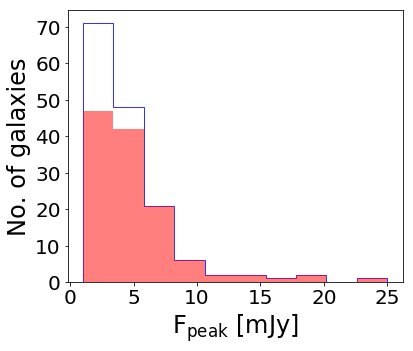

In [59]:
Histor(F_PEAK_t,F_PEAK_tm,0)
#Histo(F_PEAK_t,F_PEAK_tm,0)

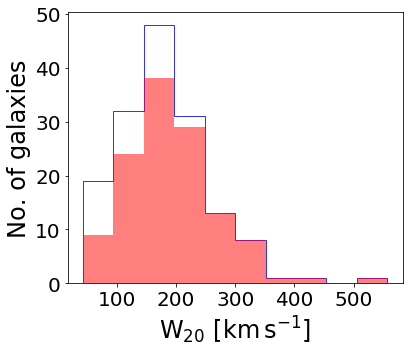

In [60]:
Histor(W20_t,W20_tm,2)
#Histo(W20_t,W20_tm,2)

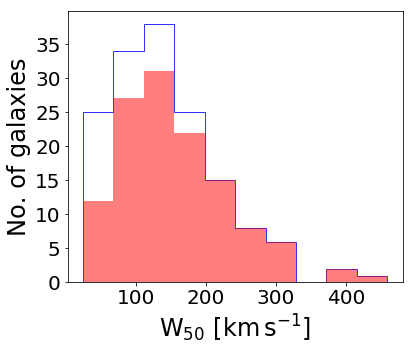

In [61]:
Histor(W50_t,W50_tm,3)
#Histo(W50_t,W50_tm,3)

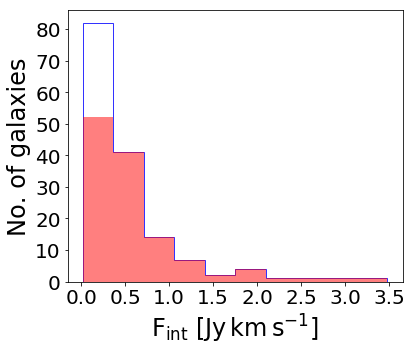

In [62]:
Histor(F_INT_t,F_INT_tm,1)
#Histo(F_INT_t,F_INT_tm,1)

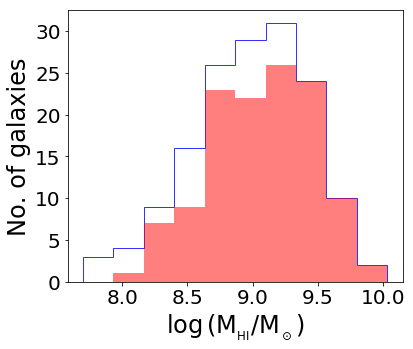

In [63]:
Histor(MASS_t,MASS_tm,4)
#Histo(MASS_t,MASS_tm,4)